In [1]:
import pandas as pd
pd.options.display.max_columns = None # 显示所有列

In [4]:
# Read .csv
data = pd.read_csv('data.csv')
data

,malignant,bilateral,age,month,bmi,diabetes,hypertension,surgery,smoking,family,menarche,menopause,miscarriage,pregnancy,childbearing,nd_blood,nd_milk,nd_serous,nd_change,nd_number,nd_mass,nd_position,nd_distance,nd_shape,nd_surface,nd_dispersion,nd_quantity,nd_distribution,nd_retraction,nd_appearance,us_ductectasia,us_intramass,us_cysmass,us_mass,us_size,us_position,us_distance,us_shape,us_boundary,us_bloodflow,us_calcification,us_birads,xray
0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,2,2,1,1,2,1,1,0,0,1,0,0,1,3,2,1,2,1,1,0,0,0
1,1,1,1,1,1,0,1,1,0,0,1,0,2,2,1,0,0,1,0,1,1,6,2,1,1,0,2,2,0,0,1,0,0,2,1,1,1,1,1,1,0,0,0
2,1,0,2,0,2,0,0,0,1,0,1,1,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,3,1,1,2,2,2,0,1,0
3,1,0,1,1,2,0,0,0,0,0,1,0,1,2,1,1,0,0,1,0,1,3,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,2,0,2,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,1,2,2,1,1,0,1,1,0,0,1,1,0,2,1,5,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,2,1,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,4,1,1,1,2,1,1,0,0,1,1,2,2,3,4,1,1,2,1,0,1,0
351,0,1,1,0,2,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,2,1,1,2,1,0,1,0
352,0,1,1,0,2,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,2,2,1,1,2,1,1,0,0,0,0,1,2,2,1,1,1,1,1,0,0,0
353,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,1,1,1,1,1,2,1,1,0,0,1,2,0,2,1,5,1,1,1,1,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   malignant         355 non-null    int64
 1   bilateral         355 non-null    int64
 2   age               355 non-null    int64
 3   month             355 non-null    int64
 4   bmi               355 non-null    int64
 5   diabetes          355 non-null    int64
 6   hypertension      355 non-null    int64
 7   surgery           355 non-null    int64
 8   smoking           355 non-null    int64
 9   family            355 non-null    int64
 10  menarche          355 non-null    int64
 11  menopause         355 non-null    int64
 12  miscarriage       355 non-null    int64
 13  pregnancy         355 non-null    int64
 14  childbearing      355 non-null    int64
 15  nd_blood          355 non-null    int64
 16  nd_milk           355 non-null    int64
 17  nd_serous         355 non-null    i

In [6]:
from pycaret.classification import *
model = setup(data=data, target = 'malignant', train_size=0.85, session_id=42)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(355, 43)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,42
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
# comparing all models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.820400,0.827000,0.543100,0.738100,0.615600,0.503400
1,Gradient Boosting Classifier,0.817100,0.832300,0.555600,0.717300,0.617500,0.501200
2,Extreme Gradient Boosting,0.813800,0.823700,0.493100,0.725400,0.580100,0.468300
3,CatBoost Classifier,0.813700,0.828500,0.502800,0.699400,0.579900,0.468000
4,Ridge Classifier,0.807400,0.000000,0.419400,0.775000,0.530900,0.425600
5,Linear Discriminant Analysis,0.807300,0.792700,0.443100,0.738800,0.538500,0.430900
6,Logistic Regression,0.800600,0.804300,0.455600,0.707900,0.546900,0.427800
7,Random Forest Classifier,0.797500,0.804600,0.370800,0.792100,0.481400,0.380800
8,Extra Trees Classifier,0.797200,0.824100,0.430600,0.677200,0.515300,0.402400
9,Ada Boost Classifier,0.794200,0.808000,0.456900,0.709800,0.536100,0.414000


In [19]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8387,0.8687,0.5556,0.8333,0.6667,0.5658
1,0.7000,0.6250,0.1250,0.3333,0.1818,0.0426
2,0.7667,0.8750,0.2500,0.6667,0.3636,0.2553
3,0.8667,0.8722,0.6250,0.8333,0.7143,0.6296
4,0.7667,0.8608,0.6250,0.5556,0.5882,0.4262
5,0.8000,0.8068,0.5000,0.6667,0.5714,0.4444
6,0.8000,0.8381,0.3750,0.7500,0.5000,0.3919
7,0.9000,0.8580,0.6250,1.0000,0.7692,0.7097
8,0.8333,0.8693,0.5000,0.8000,0.6154,0.5161
9,0.7000,0.7670,0.1250,0.3333,0.1818,0.0426


In [20]:
tuned_et = tune_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8065,0.8687,0.5556,0.7143,0.6250,0.4973
1,0.7333,0.7102,0.1250,0.5000,0.2000,0.1045
2,0.8333,0.9091,0.3750,1.0000,0.5455,0.4681
3,0.8333,0.9091,0.5000,0.8000,0.6154,0.5161
4,0.7667,0.8750,0.5000,0.5714,0.5333,0.3787
5,0.8000,0.8750,0.5000,0.6667,0.5714,0.4444
6,0.8333,0.8295,0.3750,1.0000,0.5455,0.4681
7,0.9000,0.7955,0.6250,1.0000,0.7692,0.7097
8,0.8333,0.8693,0.5000,0.8000,0.6154,0.5161
9,0.7333,0.7898,0.1250,0.5000,0.2000,0.1045


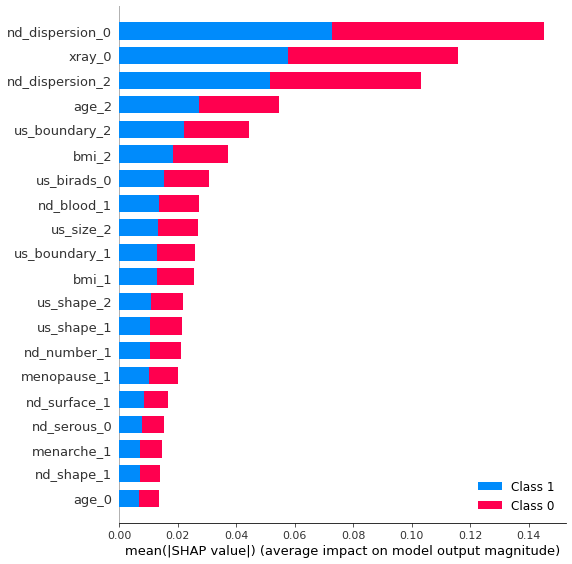

In [21]:
interpret_model(et)

In [22]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [23]:
pred_holdout = predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.8519,0.8872,0.6667,0.7692,0.7143,0.615


In [26]:
data.columns

Index(['malignant', 'bilateral', 'age', 'month', 'bmi', 'diabetes',
       'hypertension', 'surgery', 'smoking', 'family', 'menarche', 'menopause',
       'miscarriage', 'pregnancy', 'childbearing', 'disnature', 'dischange',
       'disnumber', 'intraductalmass', 'position', 'distance', 'shape',
       'surface', 'status', 'quantity', 'distribution', 'retraction',
       'appearance', 'ductectasia', 'numintramass', 'numcysmass', 'nummass',
       'ussize', 'usposition', 'usdistance', 'usshape', 'usboundary',
       'bloodflow', 'calcification', 'birads', 'xray'],
      dtype='object')

In [27]:
kerasdata = pd.DataFrame()

kerasdata['malignant'] = data['malignant']
    
kerasdata[['bilateral','diabetes','hypertension']] = data[['bilateral','diabetes','hypertension']]

kerasdata[['surgery', 'smoking', 'family','menopause']] = data[['surgery', 'smoking', 'family','menopause']]
                              
kerasdata[['dischange', 'disnumber','intraductalmass','distance','ductectasia','calcification','xray']] = data[['dischange', 'disnumber','intraductalmass','distance','ductectasia','calcification','xray']]
                              
classname = ['bmi','menarche','miscarriage','pregnancy','childbearing','disnature', 'position',  'shape', 'surface', 'status', 'quantity',  'appearance', 'numintramass', 'numcysmass', 
             'nummass', 'ussize', 'usposition', 'usdistance', 'usshape', 'usboundary', 'bloodflow', 'birads']

In [28]:
for colname in data.columns:
    if colname not in classname:
        df = pd.get_dummies(data[colname])
        df.columns = [colname + '-' + str(name) for name in df.columns ]
        kerasdata = pd.concat([kerasdata,df],axis = 1)
kerasdata

,malignant,bilateral,diabetes,hypertension,surgery,smoking,family,menopause,dischange,disnumber,...,distribution-1,distribution-2,retraction-0,retraction-1,ductectasia-0,ductectasia-1,calcification-0,calcification-1,xray-0,xray-1
0,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
1,1,1,0,1,1,0,0,0,0,1,...,0,1,1,0,0,1,1,0,1,0
2,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,1,0,1,0
3,1,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
4,1,0,1,1,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
351,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
352,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
353,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
seed = 42
testsize = 0.2
kfold = StratifiedKFold(n_splits=10, random_state =seed, shuffle=True)
X, y = kerasdata.values[:,1:], kerasdata.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=seed)

In [30]:
X_train.shape

(284, 55)

In [31]:
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(30,activation = 'relu',input_shape=(55,)))
model.add(layers.Dense(30,activation = 'relu' ))
# model.add(layers.Dense(30,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

# 二分类问题选择二元交叉熵损失函数
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                1680      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(X_train,y_train,
                    batch_size= 64,
                    epochs= 50,
                    validation_split=0.2 #分割一部分训练数据用于验证
                   )

Train on 227 samples, validate on 57 samples
Epoch 1/50
227/227 [==============================] - 0s 646us/step - loss: 0.6280 - accuracy: 0.7489 - val_loss: 0.5902 - val_accuracy: 0.7368
Epoch 2/50
227/227 [==============================] - 0s 35us/step - loss: 0.5676 - accuracy: 0.7797 - val_loss: 0.5564 - val_accuracy: 0.7368
Epoch 3/50
227/227 [==============================] - 0s 35us/step - loss: 0.5208 - accuracy: 0.7709 - val_loss: 0.5333 - val_accuracy: 0.7018
Epoch 4/50
227/227 [==============================] - 0s 44us/step - loss: 0.4839 - accuracy: 0.7709 - val_loss: 0.5136 - val_accuracy: 0.7018
Epoch 5/50
227/227 [==============================] - 0s 44us/step - loss: 0.4557 - accuracy: 0.7709 - val_loss: 0.4914 - val_accuracy: 0.7018
Epoch 6/50
227/227 [==============================] - 0s 40us/step - loss: 0.4300 - accuracy: 0.7753 - val_loss: 0.4645 - val_accuracy: 0.7018
Epoch 7/50
227/227 [==============================] - 0s 53us/step - loss: 0.4057 - accuracy: 0.

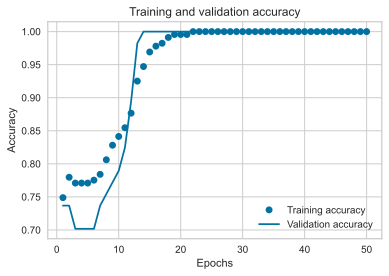

In [33]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
y_pred = model.predict_classes(X_test)

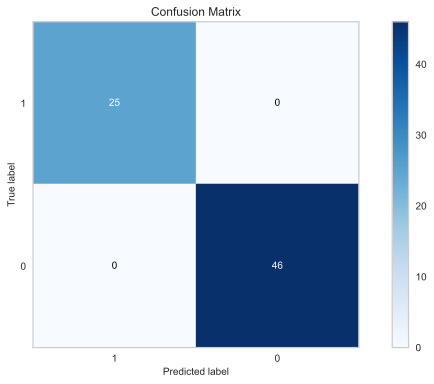

In [35]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, labels=[1,0], figsize=(12,6));